In [3]:
import numpy as np
from scipy.integrate import odeint
import pylab as plt

def CFCModel(y, t):
    bank = y[1]
    extra = y[2]
    if t>10*yr:
        dy0 = bank + extra - k1*y[0]
    else:
        dy0 = bank - k1*y[0]
    return dy0, 0., 0.


RMMCFC11=137.37 # g per mol
yr=365.*24.*3600.
k1 = 1./(55.*yr)

Ggperyearinpptv = 1e6/5e18 *(28.8/RMMCFC11) *1e12/ yr #  Gg per year -> molecules per second

time = np.linspace(start=0.0, stop=20*yr, num=20)

# null case
init = 280. # pptv
bank = 0. 
extra = 0.
yinit = np.array([init, bank, extra])
y0 =  odeint(CFCModel, yinit,  time)

# case with bank emission
init = 280. # pptv
bank = 52.* Ggperyearinpptv # 52 Gg per year -> pptv per sec
extra = 0.
yinit = np.array([init, bank, extra])
y1 =  odeint(CFCModel, yinit,  time)

# case with bank emission and dead lobsters
init = 280. # pptv
bank =  52.* Ggperyearinpptv # 52 Gg per year -> pptv per sec
extra = 13.* Ggperyearinpptv
yinit = np.array([init, bank, extra])
y2 =  odeint(CFCModel, yinit,  time)




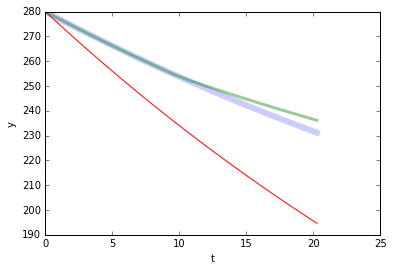

In [4]:
plt.hold(True)
plt.plot(time/ (360.*24.*3600.), y0[:,0], color='red', lw=1)#, time, y[:,1]) # y[:,0] is the first column of y
plt.plot(time/ (360.*24.*3600.), y1[:,0], lw=6, alpha=0.2)#, time, y[:,1]) # y[:,0] is the first column of y
plt.plot(time/ (360.*24.*3600.), y2[:,0], lw=3, alpha=0.4)
plt.xlabel('')
plt.ylabel('CFC11 / pptv')
#plt.ylim(140,280)
plt.show()

In [ ]:
np.shape(time)